# 1. 단항 선형 회귀 실습

* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
torch.manual_seed(123)

In [14]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train, x_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])


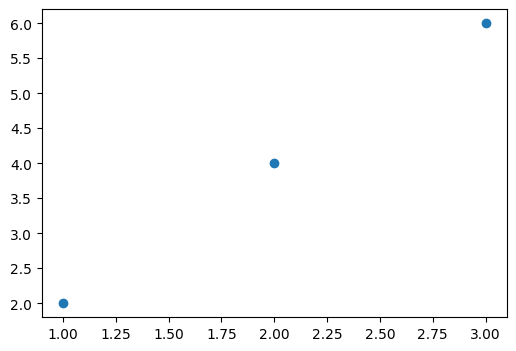

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train)

In [16]:
# y = ax + b -> y = Wx + b
model = nn.Linear(1, 1) ## nn이라는 package안에서 linear model을 만들 것이고, 입력 값이 하나, 출력 값이 하나인 모델을 만듦
print(model)
# bias = True란 bias b를 쓰겠다는 이야기

Linear(in_features=1, out_features=1, bias=True)


In [17]:
y_pred = model(x_train) # 차례대로 x_train에 있는 입력값이 들어감
print(y_pred)

tensor([[-0.3747],
        [-0.7824],
        [-1.1902]], grad_fn=<AddmmBackward0>)


In [18]:
print(list(model.parameters()))
# 첫번째 : Weight
# 두번째 : bias

[Parameter containing:
tensor([[-0.4078]], requires_grad=True), Parameter containing:
tensor([0.0331], requires_grad=True)]


In [19]:
((y_pred - y_train) ** 2).mean()

tensor(26.7365, grad_fn=<MeanBackward0>)

In [20]:
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(26.7365, grad_fn=<MseLossBackward0>)

In [21]:
# 데이터: 1, 2, 3
# W: 0.9926, b: -0.6194
# 예측: 0.3732, 1.3658, 2.3584
print(0.9926 * 1 - 0.6194)

# https://youtu.be/-GsrYvZoAdA 이진 계산이 오차가 나는 이유

0.3732000000000001


### 1-1. 경사하강법 (Gradient Descent)
* 비용 함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저(최적화) 알고리즘이라고 함
* 경사 하강법은 가장 기본적인 옵티마이저 알고리즘
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 '학습'이라고 부름

<img src= "https://i.imgur.com/0fW4LTG.png">

In [22]:
# 학습률 (learning rate): 한번 움직이는 거리 (increment step)
'''
SGD (Stochastic Gradient Descent)
- 랜덤하게 데이터를 하나씩 뽑아서 loss을 만듦 (랜덤이라 stochastic)
- 하나만 보고 빠르게 방향 결정
- 비복원추출: 다 뽑고 다시 데이터를 넣고 반복
'''
optimizer = optim.SGD(model.parameters(), lr=0.01) # model.parameters() = W, b값


In [23]:
loss = nn.MSELoss()(y_pred, y_train)

In [24]:
# gradient 초기화
optimizer.zero_grad() # 옵티마이저에 로스값에 의해서 방향을 잡아주고 편미분을 구해주기위한 계산식을 초기화 시키는 function

# 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()

# W와 b를 업데이트
optimizer.step()

print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1844]], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [25]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수 (에폭)
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss: {loss:6f}')

Epoch: 0/1000 Loss: 21.158405
Epoch: 100/1000 Loss: 0.073894
Epoch: 200/1000 Loss: 0.045662
Epoch: 300/1000 Loss: 0.028216
Epoch: 400/1000 Loss: 0.017436
Epoch: 500/1000 Loss: 0.010774
Epoch: 600/1000 Loss: 0.006658
Epoch: 700/1000 Loss: 0.004114
Epoch: 800/1000 Loss: 0.002542
Epoch: 900/1000 Loss: 0.001571
Epoch: 1000/1000 Loss: 0.000971


In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9639]], requires_grad=True), Parameter containing:
tensor([0.0821], requires_grad=True)]


In [27]:
x_test = torch.FloatTensor([[7]])
y_pred = model(x_test)
print(y_pred)

tensor([[13.8294]], grad_fn=<AddmmBackward0>)


# 2. Multiple Linear Regression
* 여러개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [28]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[150], [190], [180], [200], [130]])

print(x_train, x_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]) torch.Size([5, 3])
tensor([[150.],
        [190.],
        [180.],
        [200.],
        [130.]]) torch.Size([5, 1])


In [29]:
# y = W1x1 + W2x2 + W3x3 + ... + Wpxp + b
# row = data의 갯수 n
# col = feature / predictor의 갯수 p
model = nn.Linear(3, 1)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2867,  0.2177, -0.4919]], requires_grad=True), Parameter containing:
tensor([0.4232], requires_grad=True)]


In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [32]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss: {loss:6f}')

Epoch: 0/1000 Loss: 48372.136719
Epoch: 100/1000 Loss: 35.412594
Epoch: 200/1000 Loss: 35.267986
Epoch: 300/1000 Loss: 35.125877
Epoch: 400/1000 Loss: 34.986183
Epoch: 500/1000 Loss: 34.848942
Epoch: 600/1000 Loss: 34.713943
Epoch: 700/1000 Loss: 34.581093
Epoch: 800/1000 Loss: 34.450371
Epoch: 900/1000 Loss: 34.321629
Epoch: 1000/1000 Loss: 34.194817


In [33]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5467, 0.9980, 0.4602]], requires_grad=True), Parameter containing:
tensor([0.4209], requires_grad=True)]


In [34]:
x_test = torch.FloatTensor([[92, 92, 92]])
y_pred = model(x_test)
print(y_pred)

tensor([[184.8754]], grad_fn=<AddmmBackward0>)


# 3.

In [54]:
df = pd.read_csv('temps.csv', encoding='euc-kr')
df = df.dropna()
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [55]:
x_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)

print(x_data, x_data.shape)
print(y_data.shape)

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]]) torch.Size([8779, 1])
torch.Size([8779, 1])


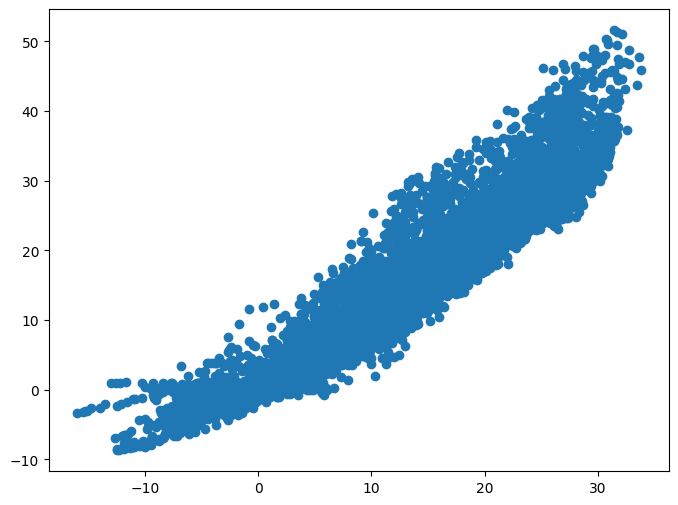

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)

In [57]:
model = nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.8487]], requires_grad=True), Parameter containing:
tensor([-0.6067], requires_grad=True)]


In [58]:
epochs = 3000

for epoch in range(epochs + 1):
    y_pred = model(x_data)
    loss = nn.MSELoss()(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/3000 Loss: 1025.101196
Epoch: 100/3000 Loss: 13.567261
Epoch: 200/3000 Loss: 13.475755
Epoch: 300/3000 Loss: 13.397954
Epoch: 400/3000 Loss: 13.331808
Epoch: 500/3000 Loss: 13.275572
Epoch: 600/3000 Loss: 13.227759
Epoch: 700/3000 Loss: 13.187108
Epoch: 800/3000 Loss: 13.152545
Epoch: 900/3000 Loss: 13.123161
Epoch: 1000/3000 Loss: 13.098179
Epoch: 1100/3000 Loss: 13.076936
Epoch: 1200/3000 Loss: 13.058878
Epoch: 1300/3000 Loss: 13.043525
Epoch: 1400/3000 Loss: 13.030471
Epoch: 1500/3000 Loss: 13.019372
Epoch: 1600/3000 Loss: 13.009934
Epoch: 1700/3000 Loss: 13.001912
Epoch: 1800/3000 Loss: 12.995092
Epoch: 1900/3000 Loss: 12.989293
Epoch: 2000/3000 Loss: 12.984364
Epoch: 2100/3000 Loss: 12.980172
Epoch: 2200/3000 Loss: 12.976607
Epoch: 2300/3000 Loss: 12.973575
Epoch: 2400/3000 Loss: 12.971002
Epoch: 2500/3000 Loss: 12.968810
Epoch: 2600/3000 Loss: 12.966949
Epoch: 2700/3000 Loss: 12.965365
Epoch: 2800/3000 Loss: 12.964019
Epoch: 2900/3000 Loss: 12.962874
Epoch: 3000/3000 Los

In [59]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0910]], requires_grad=True), Parameter containing:
tensor([0.7035], requires_grad=True)]


In [60]:
# detach(): 텐서에서 연산 이력을 새로운 텐서에 반환
y_pred = model(x_data).detach().numpy()
y_pred

array([[-8.788575 ],
       [-7.261118 ],
       [-6.6064925],
       ...,
       [-7.261118 ],
       [-9.115889 ],
       [-9.334096 ]], dtype=float32)

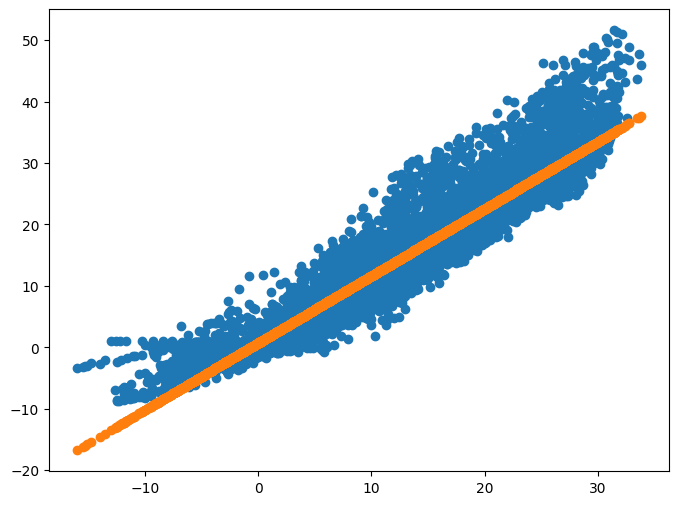

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)